# Final Assignment

## Setup

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Load Data

In [6]:
file_path = "../../data/final_assignment/"

baskets = pd.read_parquet(file_path + "baskets.parquet")
coupon_idx = pd.read_parquet(file_path + "coupon_index.parquet")
coupons = pd.read_parquet(file_path + "coupons.parquet")

print("baskets: {}".format(baskets.shape))
print("coupon_idx: {}".format(coupon_idx.shape))
print("coupons: {}".format(coupons.shape))

baskets: (68841598, 4)
coupon_idx: (10000, 3)
coupons: (45000000, 4)


In [10]:
baskets.head()

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592


In [8]:
coupon_idx.head(2)

,week,shopper,coupon
0,90,0,0
2000,90,0,1


In [9]:
coupons.head(2)

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40


## EDA

### By Table

In [ ]:
## baskets

In [47]:
baskets.head(2)

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605


In [48]:
# 0-89 weeks in baskets
baskets.week.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [79]:
# Lots of shoppers? => Will focus on 2_000 shoppers
len(baskets["shopper"].unique())
np.sort(baskets["shopper"].unique())

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [66]:
# 0 - 249 products
np.sort(baskets["product"].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [67]:
# coupon index
# - This is the outcome table we need to have it ready by adding `product` column and `discount` column

coupon_idx.head()

,week,shopper,coupon
0,90,0,0
2000,90,0,1
4000,90,0,2
6000,90,0,3
8000,90,0,4


In [88]:
coupon_idx["shopper"].unique()

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [69]:
# coupons
coupons.head(2)

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40


In [73]:
coupons["week"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [80]:
# Confirms that we have to cut down on total shoppers to 2_000
print(len(coupons["shopper"].unique()))
coupons["shopper"].unique()

100000


array([    0,     1,     2, ..., 99997, 99998, 99999])

In [82]:
# Same number of products as baskets
np.sort(coupons["product"].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Data Preprocessing

In [89]:
# 1. Necessary to shrink down baskets and coupons for only shoppers 0 - 1999
# - Required from the assignment
# - Computationally Optimal

In [101]:
# baskets_r
baskets_r = baskets[baskets["shopper"] < 2000]

# Let's compare the size after shrinking - 68_000_000 vs 1_370_000
print("original {} vs reduced {}".format(baskets.shape, baskets_r.shape))


baskets_r.head(2)

original (68841598, 4) vs reduced (1378720, 4)


,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605


In [100]:
# coupons_r
coupons_r = coupons[coupons["shopper"] < 2000]

# Let's compare the size after shrinking - 45_000_000 vs 900_000
print("original {} vs reduced {}".format(coupons.shape, coupons_r.shape))


coupons_r.head(2)

original (45000000, 4) vs reduced (900000, 4)


,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40


In [ ]:
# Create a one source DF combining coupons_r and baskets_r

# Left join 

In [102]:
baskets_r.head()

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592


In [103]:
coupons_r.head()

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30


In [110]:
# Number of row with discount and w/o discount
# df[df["discount"] != "NaN"]

In [117]:
baskets_r[(baskets_r["shopper"] == 0) & (baskets_r["week"] == 0)]

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592
5,0,0,167,582
6,0,0,171,639
7,0,0,184,651
8,0,0,207,410
9,0,0,225,602


In [115]:
coupons_r[(coupons_r["shopper"] == 0) & (coupons_r["week"] == 0)]

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30


In [118]:
# Learning - products in baskets do not match with product discount has been provided from coupons df

In [119]:
# Attempt on combining baskets_r and coupons_r

# Left join using (week, shopper, product)
df = pd.merge(baskets_r, coupons_r, how="outer", on=["week", "shopper", "product"])
print(df.shape)
df.head()

(2224473, 5)


,week,shopper,product,price,discount
0,0,0,71,629.0,NaN
1,0,0,91,605.0,NaN
2,0,0,116,715.0,NaN
3,0,0,123,483.0,NaN
4,0,0,157,592.0,NaN


In [120]:
df[(df["shopper"] == 0) & (df["week"] == 0)]

,week,shopper,product,price,discount
0,0,0,71,629.0,NaN
1,0,0,91,605.0,NaN
2,0,0,116,715.0,NaN
3,0,0,123,483.0,NaN
4,0,0,157,592.0,NaN
5,0,0,167,582.0,NaN
6,0,0,171,639.0,NaN
7,0,0,184,651.0,NaN
8,0,0,207,410.0,NaN
9,0,0,225,602.0,NaN


### Analyze One Shopper

In [24]:
# Shopper 43
shopper = 43

In [121]:
b_s = baskets_r[baskets_r["shopper"] == shopper]
c_idx_s = coupon_idx[coupon_idx["shopper"] == shopper]
c_s = coupons[coupons["shopper"] == shopper]

In [122]:
print(b_s.shape)
b_s.head(2)

(640, 4)


,week,shopper,product,price
325,0,43,43,546
326,0,43,76,582


In [123]:
b_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 325 to 68077000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   week     640 non-null    int64
 1   shopper  640 non-null    int64
 2   product  640 non-null    int64
 3   price    640 non-null    int64
dtypes: int64(4)
memory usage: 25.0 KB


In [125]:
print(c_idx_s.shape)
c_idx_s.head(10)

(5, 3)


,week,shopper,coupon
43,90,43,0
2043,90,43,1
4043,90,43,2
6043,90,43,3
8043,90,43,4


In [126]:
c_idx_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 43 to 8043
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   week     5 non-null      int64
 1   shopper  5 non-null      int64
 2   coupon   5 non-null      int64
dtypes: int64(3)
memory usage: 160.0 bytes


In [127]:
c_idx_s["coupon"].unique

<bound method Series.unique of 43      0
2043    1
4043    2
6043    3
8043    4
Name: coupon, dtype: int64>

In [140]:
# Unique products => coupons
len(c_s["product"].unique())

214

In [128]:
print(c_s.shape)
c_s.head(2)

(450, 4)


,week,shopper,product,discount
215,0,43,209,15
216,0,43,234,35


In [129]:
# The Question: How can we lay out products + discount?

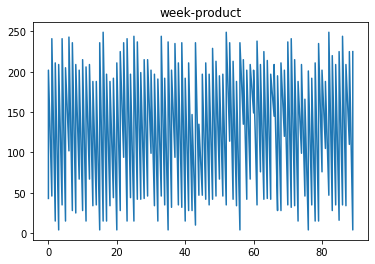

In [133]:
# baskets
# Visualize using 
# products: y-axis
# week: x-axis

x_axis = b_s["week"]
y_axis = b_s["product"]

plt.plot(x_axis, y_axis)
plt.title("week-product")
# plt.legend()
plt.show()

In [ ]:
# coupons
# products: y-axis (label with discount value)
# week: x-axis

c_x_axis = c_s["week"]
c_y_axis = c_s["product"]

# plt.plot(c_x_axis, c_y_axis)

# plt.show()

<AxesSubplot:xlabel='week', ylabel='product'>

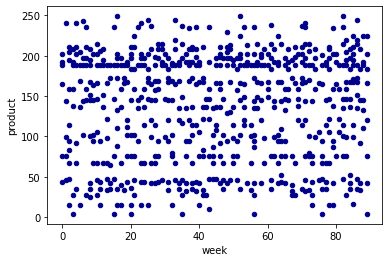

In [136]:
b_s.plot.scatter(x="week", y="product", c="DarkBlue")

<AxesSubplot:xlabel='week', ylabel='product'>

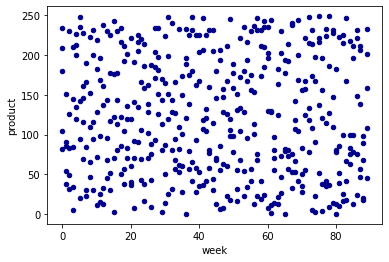

In [137]:
c_s.plot.scatter(x="week", y="product", c="DarkBlue")

<AxesSubplot:xlabel='week', ylabel='discount'>

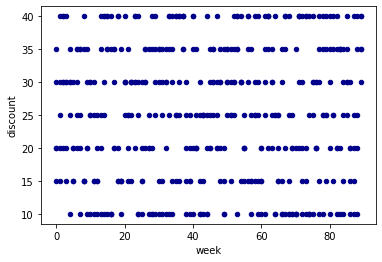

In [138]:
c_s.plot.scatter(x="week", y="discount", c="DarkBlue")

In [ ]:
# Goal -> Stimulate the purchase behavior

In [ ]:
# 

In [ ]:
# Brainstorm for Data Engineering

In [ ]:
# Coinciding product + discount ?

# Brainstorm
# 1. Discount followed by the Purcse
# 2. Purchase followed by Discount
# 3. Discount and Purchase at the sametime

In [ ]:
# Business Insight

In [ ]:
# Possible scinearios with obtaining coupon + purchase behavior
# 1. Receive coupon and use it - At the same time (valid only for the issuing week)
# 2. Received Coupon but NOT use it at all.

In [145]:
# Given that there are two subsitution goods and a history of One of them being bought, 
# (i.e. Coke and Pepsi) does it make sense to promote the OTHER one?

# -> To find this out, we observe the data that are given to us if ther has been coupon issue reflecting this behavior.
# a) p2v => clustering (subsition and complemnetary goods) => #1 TODO 
#    - Add two columns signifying `substitution` and `complementary` goods #2 TODO
# b) Setup the recommendation system with the result for week 90 => this will be also considered / training input for our coupon-giving logic - #3 TODO

# c) Given the answer to the question, we express it in equation and add it to the logic.



# Things to consider
# - Price differences (Subsitution case)

In [ ]:
# i.e. Noticing bread purchase => Give coupon to complementary goods i.e. butter

In [ ]:
# Complementary goods 

In [ ]:
# 1. Abandon this !

In [ ]:
# Confusion Matrix
# TP => Coupon Given + Pruchased
# TN => 
# FP => 
# FN =>

In [ ]:
# TP => p 9 / c 32 => 1
# TN => 
# FP => p 0 times / c 3 times
# FN => 

In [ ]:
# 2.

In [ ]:
# Coupon validity perid => is there a coupon reception + purchase relatinoship that purchase happens AFTER coupon is issued (not at the same time)